# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
raw_data.head(1)
raw_data.columns = raw_data.columns.str.strip()
raw_data['Distance (mi)'] = pd.to_numeric(raw_data['Distance (mi)'], errors='coerce')
raw_data['Workout Time (seconds)'] = pd.to_numeric(raw_data['Workout Time (seconds)'], errors='coerce')

In [105]:
# raw_data['Distance (mi)'] = raw_data['Distance (mi)'].astype(float)

In [3]:
#create my bins
bins = [0, 3.09, 6.19, 9.9, 13.09, 20]
bins2 = [0, 6.19, 20]
labels2 = ['No', 'Yes']
labels = ['Short', '5k', '10k', '10m', 'half-marathon']
raw_data['10k'] = pd.cut(raw_data['Distance (mi)'], bins=bins2, labels=labels2)
raw_data['Run_Type'] = pd.cut(raw_data['Distance (mi)'], bins=bins, labels=labels)

In [4]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Run_Type_Binaryish'] = data['Run_Type'].map({'Short': 1, '5k': 2, '10k': 3, 'half-marathon':4})
data['10k2'] = data['10k'].map({'No': 0, 'Yes': 1})


In [5]:
data['Workout Date'] = pd.to_datetime(data['Workout Date'])
data['Date Submitted'] = pd.to_datetime(data['Date Submitted'])
mean_speed = data['Avg Heart Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
data['day_of_week']=data['Workout Date'].dt.day_name()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          723 non-null    datetime64[ns]
 1   Workout Date            723 non-null    datetime64[ns]
 2   Activity Type           723 non-null    object        
 3   Calories Burned (kCal)  723 non-null    int64         
 4   Distance (mi)           723 non-null    float64       
 5   Workout Time (seconds)  723 non-null    int64         
 6   Avg Pace (min/mi)       723 non-null    float64       
 7   Max Pace (min/mi)       723 non-null    float64       
 8   Avg Speed (mi/h)        723 non-null    float64       
 9   Max Speed (mi/h)        723 non-null    float64       
 10  Avg Heart Rate          483 non-null    float64       
 11  Steps                   700 non-null    float64       
 12  Notes                   723 non-null    object    

In [6]:
data = data[data['Avg Pace (min/mi)'].between(4, 14.5)]

In [7]:
data.shape

(580, 20)

In [8]:
meanahr = data['Avg Heart Rate'].mean()
data['Avg Heart Rate'].fillna(value = meanahr, inplace = True)
#data.fillna(meanahr, inplace = True)

In [9]:
data2 = data.dropna()
data2 = data2.drop_duplicates()

In [10]:
data2.shape

(572, 20)

In [11]:
data.corr()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type_Binaryish
Calories Burned (kCal),1.000000,0.973164,0.955162,0.195077,-0.074691,-0.202780,0.073050,0.187869,0.960224,0.849315
Distance (mi),0.973164,1.000000,0.969830,0.168197,-0.065228,-0.157819,0.086413,0.223093,0.982106,0.853678
Workout Time (seconds),0.955162,0.969830,1.000000,0.367964,-0.023180,-0.348287,0.123022,0.200054,0.982268,0.791842
Avg Pace (min/mi),0.195077,0.168197,0.367964,1.000000,0.116195,-0.943162,0.122664,0.038134,0.284093,0.036196
Max Pace (min/mi),-0.074691,-0.065228,-0.023180,0.116195,1.000000,-0.114438,-0.089146,0.033660,-0.076178,-0.087652
Avg Speed (mi/h),-0.202780,-0.157819,-0.348287,-0.943162,-0.114438,1.000000,-0.106235,-0.062290,-0.304570,-0.046458
Max Speed (mi/h),0.073050,0.086413,0.123022,0.122664,-0.089146,-0.106235,1.000000,0.008127,0.106996,0.062756
Avg Heart Rate,0.187869,0.223093,0.200054,0.038134,0.033660,-0.062290,0.008127,1.000000,0.211971,0.236984
Steps,0.960224,0.982106,0.982268,0.284093,-0.076178,-0.304570,0.106996,0.211971,1.000000,0.817926
Run_Type_Binaryish,0.849315,0.853678,0.791842,0.036196,-0.087652,-0.046458,0.062756,0.236984,0.817926,1.000000


## Variables

In [12]:
# Create the dependent and independent variables
y = data2['10k2']
x1 = data2['Calories Burned (kCal)']

In [13]:
y.shape

(572,)

In [14]:
x1.shape

(572,)

In [15]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.061760
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   10k2   No. Observations:                  572
Model:                          Logit   Df Residuals:                      570
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.8219
Time:                        09:56:07   Log-Likelihood:                -35.326
converged:                       True   LL-Null:                       -198.37
Covariance Type:            nonrobust   LLR p-value:                 6.813e-73
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.3611      2.063     -7.447      0.000     -19.404     -11.318
Calories Burned (kCal)     0.0209      0.003      7.492      0.000       0.015       0.026
==========================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Let's plot the data

### Scatter plot

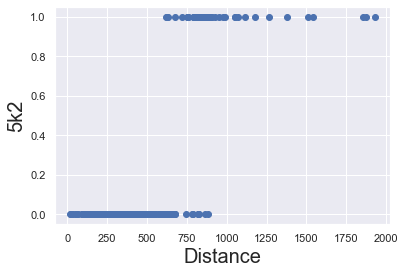

In [119]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('5k2', fontsize = 20)
plt.show()

### Plot with a regression line

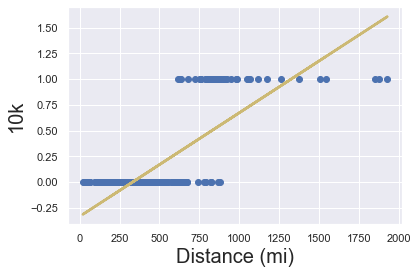

In [120]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('10k', fontsize = 20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.061897
         Iterations 10


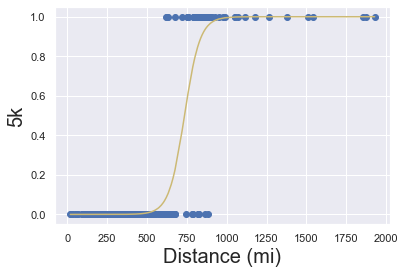

In [121]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('5k', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

Optimization terminated successfully.
         Current function value: 0.061897
         Iterations 10


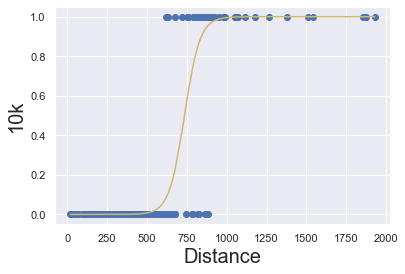

In [122]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('10k', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

## Log Reg Part 2

In [123]:
#Adding my additional estimators to see which model is the most accurate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns



In [124]:
#This creates my dictionary of estimators
knn = KNeighborsClassifier() #default is k=5 nearest neighbors
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

In [125]:
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 714
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          576 non-null    datetime64[ns]
 1   Workout Date            576 non-null    datetime64[ns]
 2   Activity Type           576 non-null    object        
 3   Calories Burned (kCal)  576 non-null    int64         
 4   Distance (mi)           576 non-null    float64       
 5   Workout Time (seconds)  576 non-null    int64         
 6   Avg Pace (min/mi)       576 non-null    float64       
 7   Max Pace (min/mi)       576 non-null    float64       
 8   Avg Speed (mi/h)        576 non-null    float64       
 9   Max Speed (mi/h)        576 non-null    float64       
 10  Avg Heart Rate          576 non-null    float64       
 11  Steps                   575 non-null    float64       
 12  Notes                   576 non-null    object    

In [128]:
data.isnull().sum()

Date Submitted            0
Workout Date              0
Activity Type             0
Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace (min/mi)         0
Avg Speed (mi/h)          0
Max Speed (mi/h)          0
Avg Heart Rate            0
Steps                     1
Notes                     0
Source                    0
Link                      0
10k                       0
Run_Type                  0
Run_Type_Binaryish        7
10k2                      0
day_of_week               0
dtype: int64

In [129]:
data.dropna(inplace=True)

In [130]:
data.isnull().sum()

Date Submitted            0
Workout Date              0
Activity Type             0
Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace (min/mi)         0
Avg Speed (mi/h)          0
Max Speed (mi/h)          0
Avg Heart Rate            0
Steps                     0
Notes                     0
Source                    0
Link                      0
10k                       0
Run_Type                  0
Run_Type_Binaryish        0
10k2                      0
day_of_week               0
dtype: int64

In [131]:
dataframe = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)','Steps']]
dataframetarget = data[['Run_Type_Binaryish']]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    dataframe, dataframetarget, random_state=11)  # random_state for reproducibility

In [133]:
knn.fit(X=X_train, y=y_train)

c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [134]:
expected_labels = y_test #We also require our expected labels for future analysis.

In [135]:
predicted_labels = knn.predict(X=X_test)

In [34]:
print(predicted_labels[:20])

[2 2 3 3 2 2 2 2 2 3 1 2 2 1 2 1 2 1 2 1]


In [136]:
print(expected_labels[:20])

     Run_Type_Binaryish
164                 3.0
243                 2.0
74                  2.0
353                 2.0
60                  1.0
654                 1.0
342                 1.0
430                 3.0
328                 1.0
155                 2.0
595                 1.0
193                 2.0
426                 1.0
319                 2.0
519                 2.0
244                 2.0
189                 2.0
469                 2.0
499                 2.0
433                 2.0


In [137]:
wrong = [(p, e) for (p, e) in zip(predicted_labels, expected_labels) if p != e]

print(wrong)
print(f'The classifier incorrectly predicted {len(wrong)} of {len(expected_labels)} samples.')

[(3.0, 'Run_Type_Binaryish')]
The classifier incorrectly predicted 1 of 142 samples.


In [138]:
print(f'{knn.score(X_test, y_test):.2%}')

91.55%


In [139]:
confusion = confusion_matrix(y_true=expected_labels, y_pred=predicted_labels)

In [140]:
confusion

array([[34,  5,  0,  0],
       [ 2, 81,  3,  1],
       [ 0,  1, 15,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [141]:
confusion_df = pd.DataFrame(confusion, index=range(4), columns=range(4))

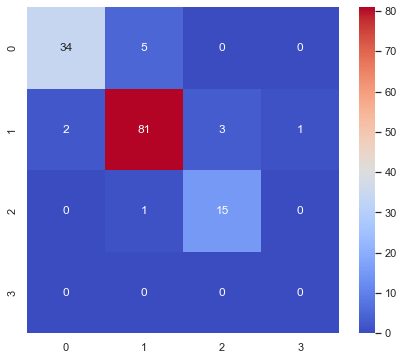

In [142]:
import seaborn as sns
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='coolwarm') 

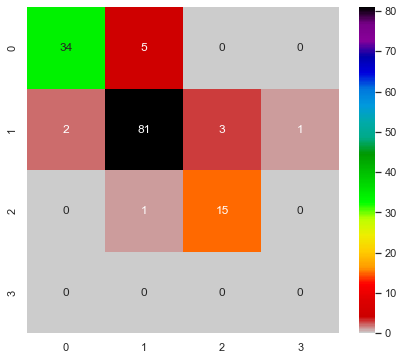

In [143]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='nipy_spectral_r') 

## K-Fold Class (2 Fold)

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [145]:
kfold = KFold(n_splits=2, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=dataframe, y=dataframetarget, cv=kfold)

c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [146]:
scores*100

array([92.95774648, 89.43661972])

In [147]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 91.20%


## K-Fold Class (20 Fold)

In [148]:
kfold = KFold(n_splits=20, random_state=11, shuffle=True)

In [149]:
scores = cross_val_score(estimator=knn, X=dataframe, y=dataframetarget, cv=kfold)

c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [150]:
scores*100

array([ 93.10344828,  89.65517241,  93.10344828,  96.55172414,
        89.65517241,  93.10344828,  96.55172414,  93.10344828,
        96.42857143,  92.85714286,  85.71428571,  96.42857143,
       100.        ,  89.28571429,  89.28571429,  89.28571429,
       100.        ,  92.85714286,  92.85714286,  92.85714286])

In [151]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.13%


## Multiple Models

In [152]:
#Adding my additional estimators to see which model is the most accurate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [153]:
#This creates my dictionary of estimators
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

In [154]:
#This will run the estimator model for the three estimators below - KNN, SVC, GNB
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=dataframe, y=dataframetarget, cv=kfold)
    print(f'{estimator_name:>2}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.13%
SVC: mean accuracy=86.62%; standard deviation=3.36%
GaussianNB: mean accuracy=91.91%; standard deviation=3.14%


c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

## Decision Tree Model

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, dataframetarget, random_state=0)

In [157]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [158]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [159]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

c:\Users\coleb\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2.])

In [160]:
clf.predict(X_test[0:10])

array([2., 2., 3., 1., 1., 1., 2., 1., 1., 2.])

In [161]:
score = clf.score(X_test, y_test)
print(score)

0.971830985915493


In [162]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

C:\Users\coleb\AppData\Local\Temp\ipykernel_41724\1914883130.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


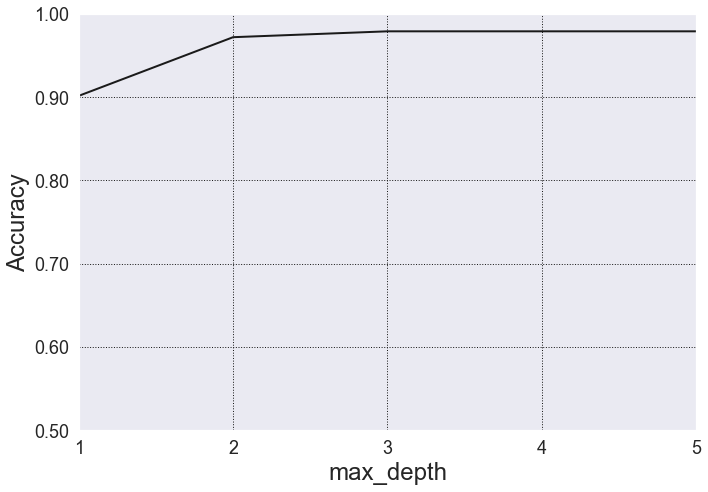

In [163]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

## Decision Tree Visualization

### Load Packages

In [164]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

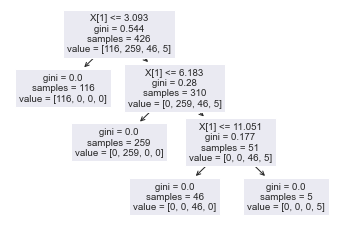

In [165]:
tree.plot_tree(clf);

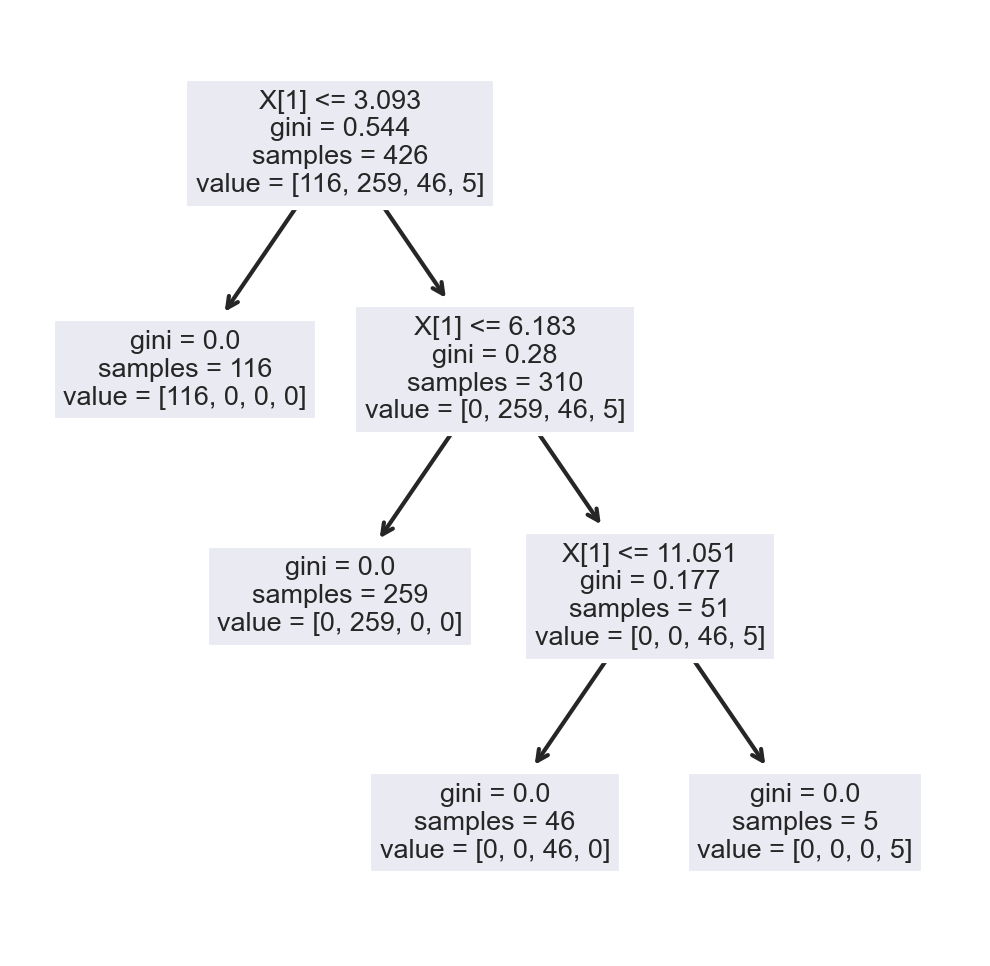

In [166]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);

In [167]:
dataframe.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps'],
      dtype='object')

In [168]:
fn = ['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps', '10k2']
cn = ['Short Run', '5k', '10k', 'Half Marathon']

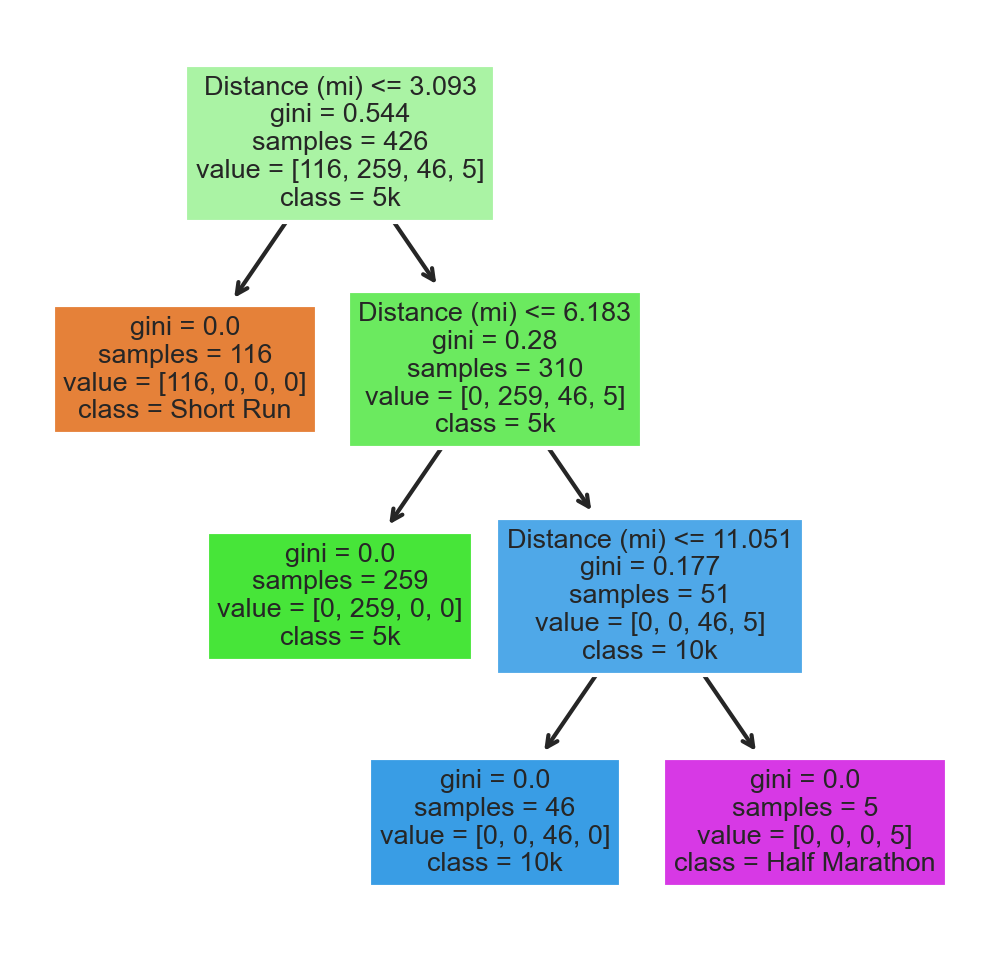

In [169]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('plottreefncn.png')

## KNN 

### Load Packages

In [170]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [171]:
# Store the feature data
X = dataframe
# store the target data
y = dataframetarget
Y = dataframetarget
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Train the Data

In [172]:
X_train.shape

(426, 8)

In [173]:
X_test.shape

(142, 8)

In [174]:
y_train.shape

(426, 1)

In [175]:
y_test.shape

(142, 1)

In [176]:
dataframe.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps'],
      dtype='object')

In [177]:
features = ['Calories Burned (kCal)','Steps']


In [178]:
x = StandardScaler().fit_transform(x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


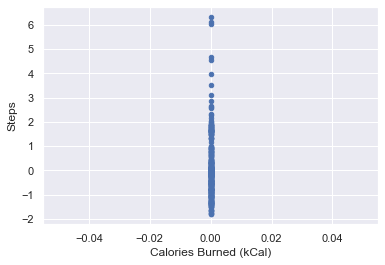

In [179]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('Calories Burned (kCal)','Steps' )

# Add labels
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');

In [180]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

In [181]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [182]:
x = pd.DataFrame(x, columns = features)

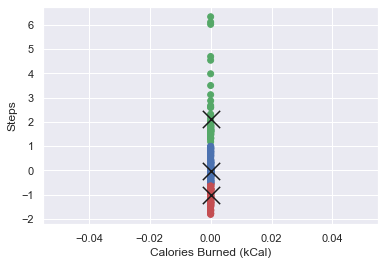

In [183]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');

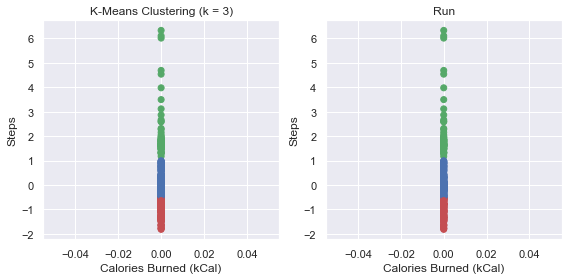

In [185]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');
plt.title('Run')

plt.tight_layout()

## Cluster Analysis

In [186]:
data.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,10k,Run_Type,Run_Type_Binaryish,10k2,day_of_week
0,2022-08-20,2022-08-20,Run,1544,13.11,11065,14.0669,7.71115,4.26534,7.78094,140.0,22531.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6793063441,Yes,half-marathon,4.0,1,Saturday


In [187]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

In [188]:
round(data.describe(),2)

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type_Binaryish
count,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00,568.00
mean,444.00,3.52,2082.29,9.76,1.37,6.23,50.70,123.02,6039.43,1.85
std,234.66,1.81,1218.30,1.20,2.60,0.67,144.98,45.02,10623.74,0.63
min,19.00,0.18,106.00,7.77,0.00,4.14,0.00,0.00,8.00,1.00
25%,337.00,2.85,1565.25,8.99,0.00,5.97,0.00,122.96,4148.25,1.00
50%,407.50,3.10,1800.00,9.57,0.80,6.27,19.13,122.96,4796.00,2.00
75%,468.25,3.90,2229.25,10.06,1.16,6.67,61.86,151.00,5993.75,2.00
max,1928.00,13.48,11065.00,14.48,31.95,7.72,1853.55,169.00,193886.00,4.00


In [189]:

df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Date Submitted,489
Workout Date,518
Activity Type,4
Calories Burned (kCal),316
Distance (mi),431
Workout Time (seconds),464
Avg Pace (min/mi),546
Max Pace (min/mi),354
Avg Speed (mi/h),548


In [190]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['10k', '10k2']

In [191]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Activity Type', 'Run_Type', 'Run_Type_Binaryish']

In [192]:
[[i, list(data[i].unique())] for i in categorical_variables]

[['Activity Type', ['Run', 'Indoor Run / Jog', 'Walk', 'Machine Workout']],
 ['Run_Type', ['half-marathon', '10k', '5k', 'Short']],
 ['Run_Type_Binaryish', [4.0, 3.0, 2.0, 1.0]]]

In [193]:
ordinal_variables = ['Run', 'Walk']

In [194]:
data['day_of_week'].unique()

array(['Saturday', 'Wednesday', 'Monday', 'Sunday', 'Friday', 'Thursday',
       'Tuesday'], dtype=object)

In [195]:
ordinal_variables.append('day_of_week')

In [196]:
numeric_variables = list(set(data.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<AxesSubplot:title={'center':'Max Speed (mi/h)'}>,
        <AxesSubplot:title={'center':'Avg Speed (mi/h)'}>,
        <AxesSubplot:title={'center':'Date Submitted'}>],
       [<AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Workout Date'}>,
        <AxesSubplot:title={'center':'Avg Heart Rate'}>],
       [<AxesSubplot:title={'center':'Distance (mi)'}>,
        <AxesSubplot:title={'center':'Workout Time (seconds)'}>,
        <AxesSubplot:title={'center':'Avg Pace (min/mi)'}>],
       [<AxesSubplot:title={'center':'Calories Burned (kCal)'}>,
        <AxesSubplot:title={'center':'Max Pace (min/mi)'}>,
        <AxesSubplot:>]], dtype=object)

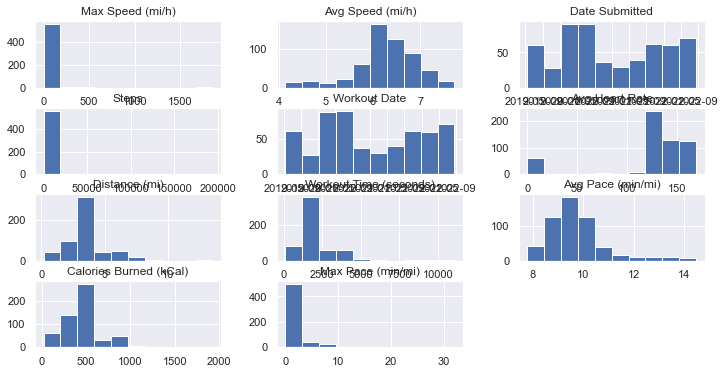

In [197]:
data[numeric_variables].hist(figsize=(12, 6))

In [96]:
# data['day_of_week'] = pd.cut(data['day_of_week'], bins=5)

Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
Scale the data using one of the scaling methods discussed in the course.
Save the processed dataframe as a comma-separated file: 

In [198]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [199]:
lb, le = LabelBinarizer(), LabelEncoder()

In [200]:
# for column in ordinal_variables:
#     data[column] = le.fit_transform(data[column])

In [201]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [202]:
# for column in [ordinal_variables + numeric_variables]:
#     data[column] = mm.fit_transform(data[column])

In [203]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [204]:
df = data

In [205]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 714
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          568 non-null    datetime64[ns]
 1   Workout Date            568 non-null    datetime64[ns]
 2   Activity Type           568 non-null    object        
 3   Calories Burned (kCal)  568 non-null    int64         
 4   Distance (mi)           568 non-null    float64       
 5   Workout Time (seconds)  568 non-null    int64         
 6   Avg Pace (min/mi)       568 non-null    float64       
 7   Max Pace (min/mi)       568 non-null    float64       
 8   Avg Speed (mi/h)        568 non-null    float64       
 9   Max Speed (mi/h)        568 non-null    float64       
 10  Avg Heart Rate          568 non-null    float64       
 11  Steps                   568 non-null    float64       
 12  Notes                   568 non-null    object    

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [206]:
df = df[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps', '10k2']].round(0)

In [207]:
# Set up X and y variables
y, X = df['10k2'], df.drop(columns='10k2')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [208]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       197
           1       0.91      0.97      0.94        31

    accuracy                           0.98       228
   macro avg       0.95      0.98      0.96       228
weighted avg       0.98      0.98      0.98       228

Accuracy score:  0.98
F1 Score:  0.94


Text(0.5, 84.5, 'Ground Truth')

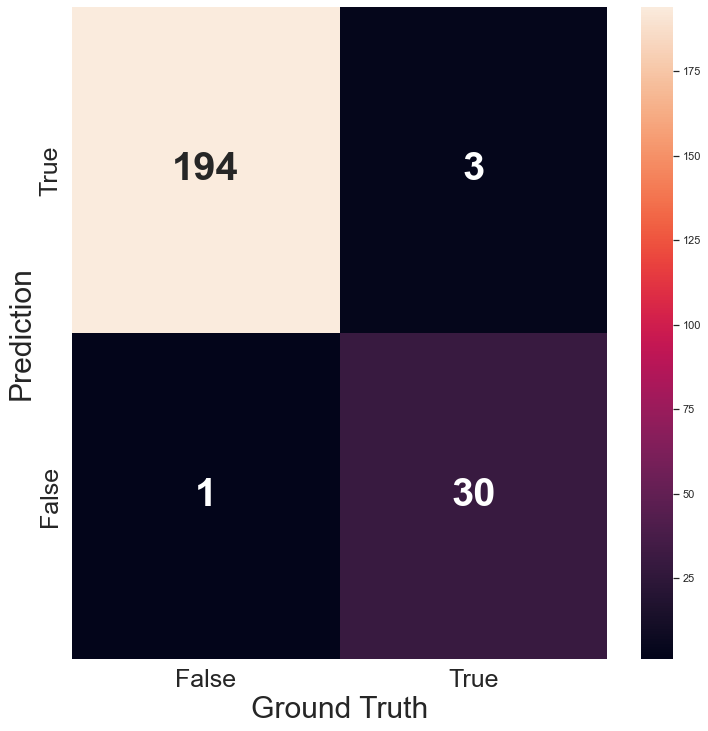

In [209]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
This time, use K=5 and weight the results by distance.
Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.

In [210]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       197
           1       0.91      0.97      0.94        31

    accuracy                           0.98       228
   macro avg       0.95      0.98      0.96       228
weighted avg       0.98      0.98      0.98       228

Accuracy score:  0.98
F1 Score:  0.94


Text(0.5, 84.5, 'Ground Truth')

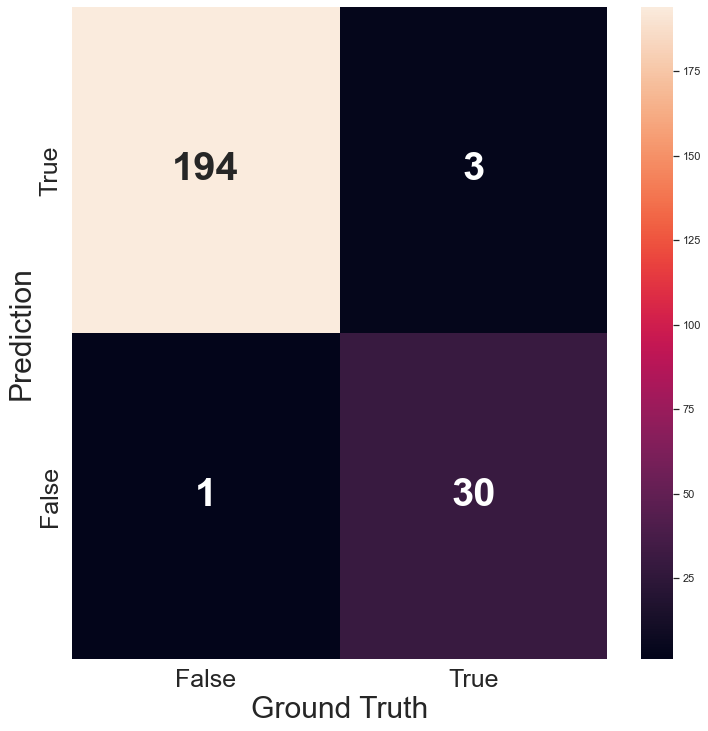

In [211]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [212]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

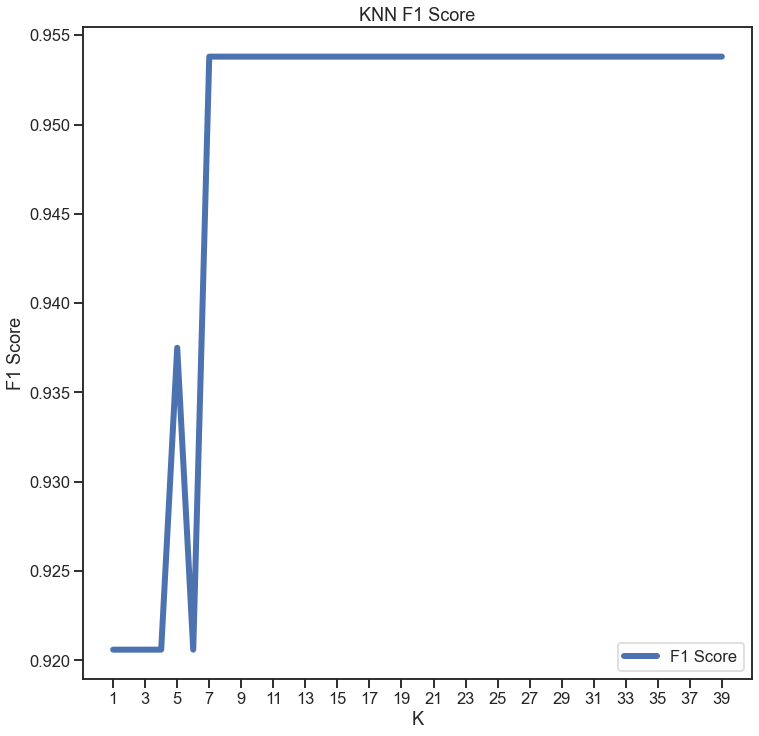

In [213]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

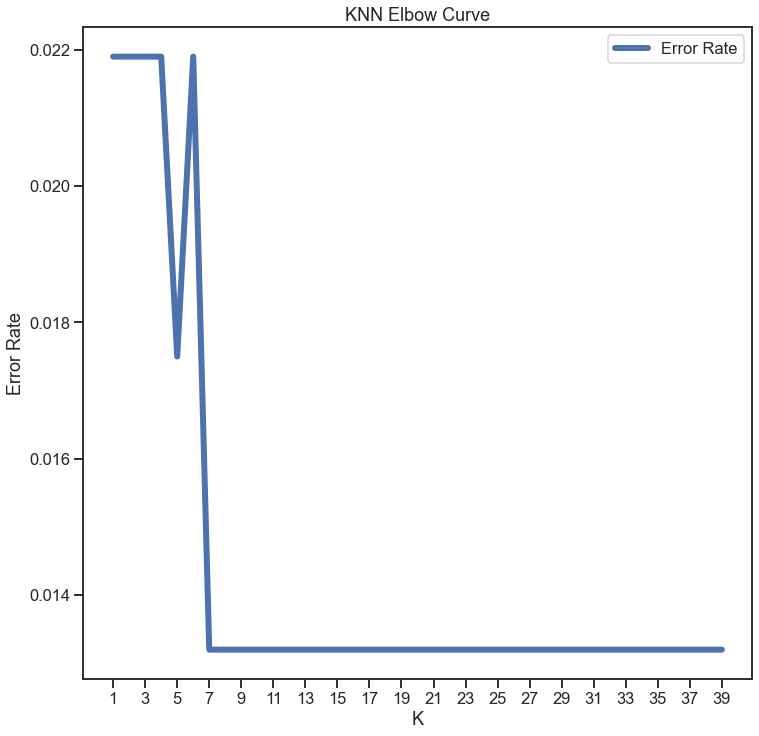

In [214]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

## KNN

In [215]:
data2 = data[['Calories Burned (kCal)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Steps', 'Distance (mi)', '10k2']]

In [216]:
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1:]

In [217]:
X.describe()

,Calories Burned (kCal),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Steps,Distance (mi)
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,444.001761,2082.286972,9.755385,1.369894,6.231838,50.699152,6039.426056,3.517084
std,234.664761,1218.295528,1.201403,2.597630,0.672900,144.977098,10623.744643,1.807006
min,19.000000,106.000000,7.774190,0.000000,4.144070,0.000000,8.000000,0.178743
25%,337.000000,1565.250000,8.994528,0.000000,5.965348,0.000000,4148.250000,2.845035
50%,407.500000,1800.000000,9.566365,0.796870,6.271975,19.131200,4796.000000,3.100000
75%,468.250000,2229.250000,10.058125,1.160347,6.670730,61.861600,5993.750000,3.896682
max,1928.000000,11065.000000,14.478500,31.954800,7.717840,1853.550000,193886.000000,13.481600


In [218]:
y.value_counts(normalize=True)

10k2
0       0.887324
1       0.112676
dtype: float64

<AxesSubplot:xlabel='10k2'>

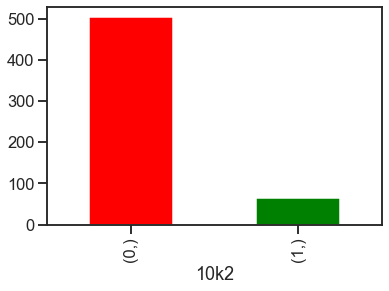

In [219]:
y.value_counts().plot.bar(color=['red', 'green'])

In [220]:
# Split 80% as training dataset
# and 20% as testing dataset
rs=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

Training a KNN classifier is very similar to training other classifiers in `sklearn`, we first need to define a `KNeighborsClassifier` object. Here we use `n_neighbors=2` argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.


In [221]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

In [222]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [223]:
preds = knn_model.predict(X_test)

In [224]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [225]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [226]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9736842105263158,
 'recall': 0.9736842105263158,
 'precision': 0.9736842105263158,
 'f1score': 0.9736842105263158}

In [227]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.956140350877193,
 'recall': 0.956140350877193,
 'precision': 0.956140350877193,
 'f1score': 0.956140350877193}

In [228]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [229]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.8966
2,0.8889
3,0.8667
4,0.8667
5,0.8387
6,0.8387
7,0.8387
8,0.8387
9,0.8387


Text(0.5, 1.0, 'KNN F1 Score')

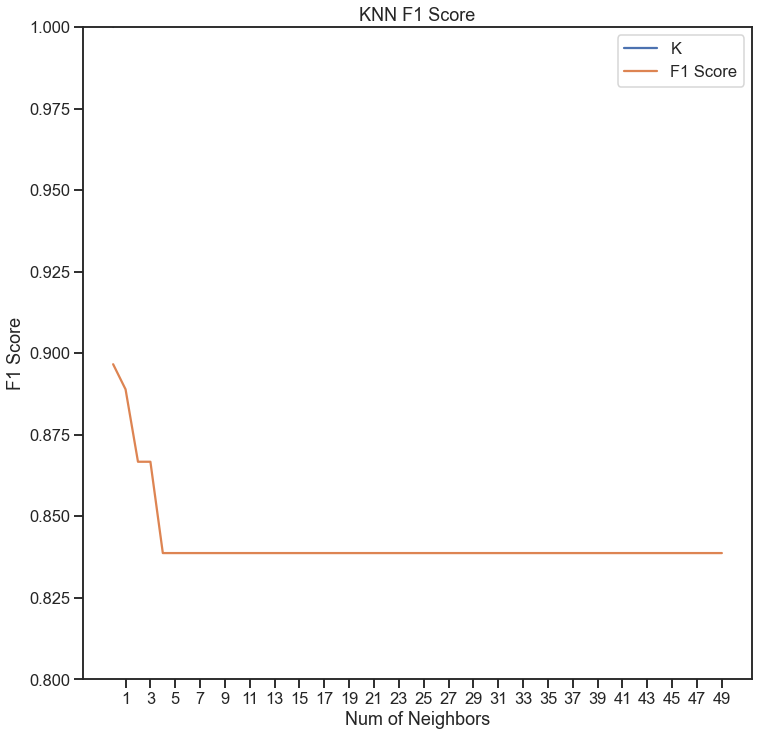

In [231]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.80, 1))
plt.title('KNN F1 Score')

## Random Forest

In [232]:
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [234]:
data = data[['Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', 'Run_Type', '10k2', '10k', 'Run_Type_Binaryish', 'day_of_week']]

In [235]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type_Binaryish
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,444.001761,3.517084,2082.286972,9.755385,1.369894,6.231838,50.699152,123.017175,6039.426056,1.846831
std,234.664761,1.807006,1218.295528,1.201403,2.597630,0.672900,144.977098,45.024080,10623.744643,0.630884
min,19.000000,0.178743,106.000000,7.774190,0.000000,4.144070,0.000000,0.000000,8.000000,1.000000
25%,337.000000,2.845035,1565.250000,8.994528,0.000000,5.965348,0.000000,122.961111,4148.250000,1.000000
50%,407.500000,3.100000,1800.000000,9.566365,0.796870,6.271975,19.131200,122.961111,4796.000000,2.000000
75%,468.250000,3.896682,2229.250000,10.058125,1.160347,6.670730,61.861600,151.000000,5993.750000,2.000000
max,1928.000000,13.481600,11065.000000,14.478500,31.954800,7.717840,1853.550000,169.000000,193886.000000,4.000000


for col in ['hypertension','heart_disease','stroke']:
 stroke_data_replaced[col]=stroke_data_replaced[col].replace([0,1],['No','Yes'])

In [236]:
categorical_col=[]
numerical_col=[]
for col in data.dtypes.index:
    if data[col].dtype == 'object':
        categorical_col.append(col)
    else:
        numerical_col.append(col)


In [237]:

print("Numerical Columns in DataFrame are :",numerical_col, '\n')
print("Categorical Columns in DataFrame are :",categorical_col)


Numerical Columns in DataFrame are : ['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Run_Type', '10k2', '10k', 'Run_Type_Binaryish'] 

Categorical Columns in DataFrame are : ['Activity Type', 'Notes', 'Source', 'Link', 'day_of_week']


In [238]:
data = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Run_Type', 'Run_Type_Binaryish']]

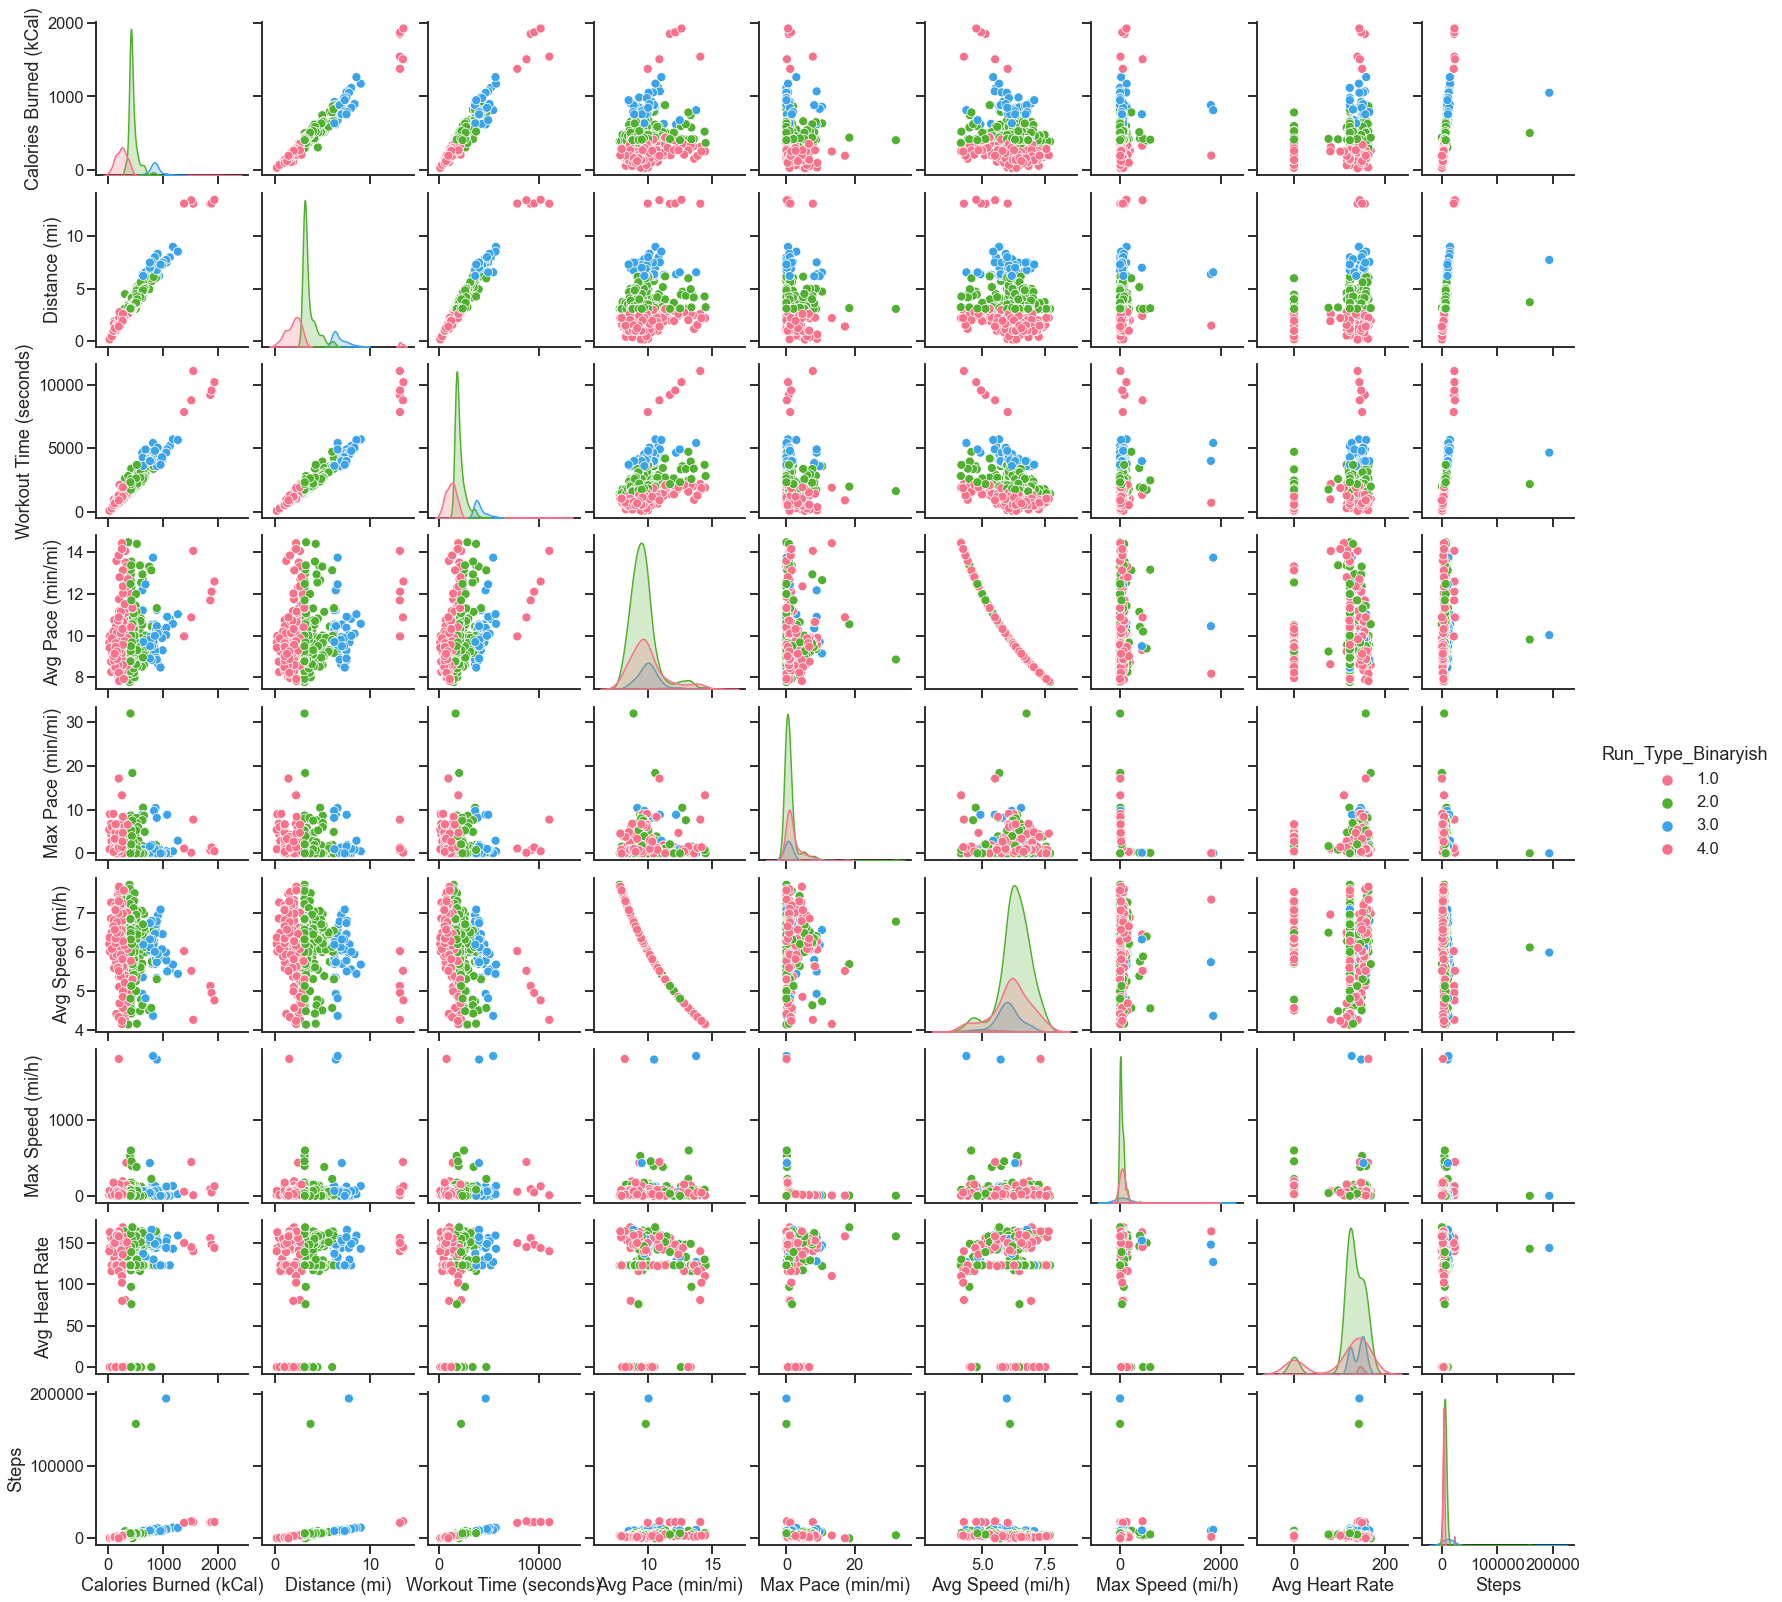

In [239]:
sns.pairplot(data,hue='Run_Type_Binaryish',palette='husl')


In [240]:
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
Calories Burned (kCal),316
Distance (mi),431
Workout Time (seconds),464
Avg Pace (min/mi),546
Max Pace (min/mi),354
Avg Speed (mi/h),548
Max Speed (mi/h),355
Avg Heart Rate,54
Steps,521


In [241]:
num_missing = data.isnull().sum()
percentage_missing = data.isnull().sum().apply(lambda x: x/data.shape[0]*100)

In [242]:
missing_data = pd.DataFrame({'Number of Missing':  num_missing,
                             'Percentage of Missing': percentage_missing})

missing_data['Percentage of Missing'].sort_values(ascending = False)

Calories Burned (kCal)    0.0
Distance (mi)             0.0
Workout Time (seconds)    0.0
Avg Pace (min/mi)         0.0
Max Pace (min/mi)         0.0
Avg Speed (mi/h)          0.0
Max Speed (mi/h)          0.0
Avg Heart Rate            0.0
Steps                     0.0
Run_Type                  0.0
Run_Type_Binaryish        0.0
Name: Percentage of Missing, dtype: float64

In [243]:
from collections import Counter

In [244]:
def detect_outlier(df,num_cols,outlier_in_row=2):
    outlier_indices=[]
    for col in num_cols:
        Q1=np.percentile(df[col],25)
        Q3=np.percentile(df[col],75)
        IQR=Q3-Q1
        step_size=1.5 * IQR
        outlier_indices.extend(df[(df[col]<Q1-step_size) | (df[col]>Q3+step_size)].index)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=[k for k,v in outlier_indices.items() if v> outlier_in_row]
    return multiple_outliers


    


In [245]:
drop_outliers=detect_outlier(data,['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps'],2)

In [246]:
data.loc[drop_outliers]

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type,Run_Type_Binaryish
0,1544,13.11000,11065,14.06690,7.711150,4.26534,7.78094,140.0,22531.0,half-marathon,4.0
1,859,6.56000,3600,9.14634,10.365400,6.56000,5.78848,147.0,9295.0,10k,3.0
4,831,6.21000,3617,9.70746,9.712310,6.18081,6.17773,144.0,9306.0,10k,3.0
6,863,7.02161,4441,10.53930,0.967622,5.69300,62.00770,144.0,11520.0,10k,3.0
8,797,6.34867,4013,10.53180,0.503541,5.69702,119.15600,146.0,10360.0,10k,3.0
...,...,...,...,...,...,...,...,...,...,...,...
297,410,3.15417,2491,13.16230,0.099874,4.55848,600.75800,0.0,5378.0,5k,2.0
578,332,2.60421,2099,13.31850,0.432320,4.50501,138.78600,0.0,4530.0,Short,1.0
614,265,2.03220,1602,13.13030,1.541920,4.56957,38.91260,0.0,3612.0,Short,1.0
702,249,2.21734,1921,14.43370,13.253900,4.15693,4.52698,110.0,3887.0,Short,1.0


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 714
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Calories Burned (kCal)  568 non-null    int64   
 1   Distance (mi)           568 non-null    float64 
 2   Workout Time (seconds)  568 non-null    int64   
 3   Avg Pace (min/mi)       568 non-null    float64 
 4   Max Pace (min/mi)       568 non-null    float64 
 5   Avg Speed (mi/h)        568 non-null    float64 
 6   Max Speed (mi/h)        568 non-null    float64 
 7   Avg Heart Rate          568 non-null    float64 
 8   Steps                   568 non-null    float64 
 9   Run_Type                568 non-null    category
 10  Run_Type_Binaryish      568 non-null    float64 
dtypes: category(1), float64(8), int64(2)
memory usage: 65.7 KB


In [248]:
train_df=data.drop(drop_outliers,axis=0).reset_index(drop=True)

In [249]:
test_df = data.Run_Type_Binaryish

In [250]:
dataset=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [251]:
dataset=dataset.fillna(np.nan)
dataset.isnull().sum()

Calories Burned (kCal)    568
Distance (mi)             568
Workout Time (seconds)    568
Avg Pace (min/mi)         568
Max Pace (min/mi)         568
Avg Speed (mi/h)          568
Max Speed (mi/h)          568
Avg Heart Rate            568
Steps                     568
Run_Type                  568
Run_Type_Binaryish        568
0                         455
dtype: int64

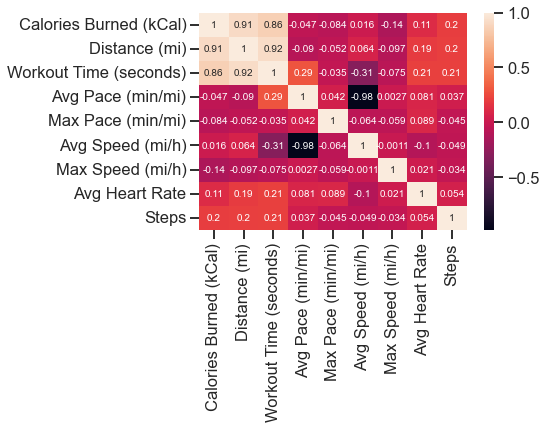

In [252]:
# Correlation Matrix of Numeric Variables
g=sns.heatmap(train_df[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps']].corr(),annot=True)

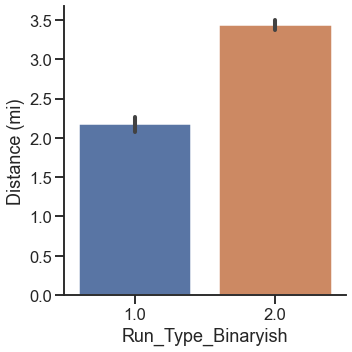

In [253]:
g=sns.catplot(x='Run_Type_Binaryish',y='Distance (mi)',data=train_df,kind="bar")

In [254]:
import os

# os.chdir("../input/titanic")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter
# For Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score,learning_curve
sns.set(style='white',context='notebook',palette='deep')

In [256]:
random_state=1
classifiers=[]
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)
                                      ,random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))

cv_results=[]

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X=X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=-1))

cv_means=[]
cv_std=[]
for i in cv_results:
    cv_means.append(i.mean())
    cv_std.append(i.std())
cv_res=pd.DataFrame({"cross_val_means":cv_means,"cross_val_std":cv_std,
                     "Algorithm":["SVC","DecisionTree","Adabosst","RandomForest","Extratree","GradientBoost","Kneighbours","LR"]})

In [257]:
train=dataset[:len(train_df)]
test=dataset[len(train_df):]
test.drop(labels="Run_Type_Binaryish",axis=1,inplace=True)

In [258]:
train["Run_Type_Binaryish"]=train["Run_Type_Binaryish"].astype(int)
Y_train=train["Run_Type_Binaryish"]
X_train=train.drop(labels="Run_Type_Binaryish",axis=1)

In [259]:
kfold=StratifiedKFold(n_splits=10)

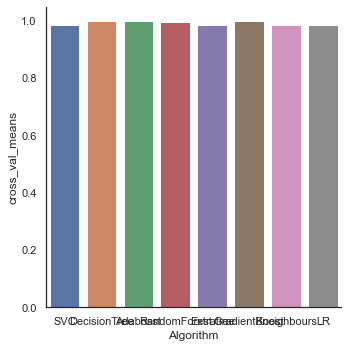

In [260]:
g=sns.catplot(x="Algorithm",y="cross_val_means",data=cv_res,kind="bar")

In [261]:
cv_res

,cross_val_means,cross_val_std,Algorithm
0,0.984589,0.014012,SVC
1,0.997778,0.006667,DecisionTree
2,0.997778,0.006667,Adabosst
3,0.995604,0.008793,RandomForest
4,0.984638,0.019615,Extratree
5,0.997778,0.006667,GradientBoost
6,0.984589,0.014012,Kneighbours
7,0.984638,0.013989,LR


In [263]:
# decision_tree=DecisionTreeClassifier()
# adadecision=AdaBoostClassifier(decision_tree,random_state=random_state)
# ada_param_grid={"base_estimator__criterion":["gini","entropy"],
#                "base_estimator__splitter":["best","random"],
#                "algorithm":["SAMME","SAMME.R"],
#                "n_estimators":[1,2,50,100,200],
#                "learning_rate":[0.0001,0.001,0.01,0.1,0.2,0.3]}

# grid_serarch=GridSearchCV(adadecision,param_grid=ada_param_grid,cv=kfold,
#                           scoring="accuracy",n_jobs=-1,verbose=1)
# grid_serarch.fit(X_train,Y_train)
# ada_best=grid_serarch.best_estimator_

In [264]:
# RFC=RandomForestClassifier()
# rfc_grid={"bootstrap":[True,False],
#           "n_estimators":[100,200,300,400,500]
#          }
# grid_serach_rf=GridSearchCV(RFC,rfc_grid,cv=kfold,n_jobs=-1,scoring="accuracy",verbose=-1)
# grid_serach_rf.fit(X_train,Y_train)
# rf_best=grid_serach_rf.best_estimator_
# grid_serach_rf.best_score_